# SIMULE EL PRIMER SISTEMA CUÁNTICO DESCRITO EN LA SECCIÓN 4.1.
### Miguel Angel Motta
El sistema consiste en una partícula confinada a un conjunto discreto de posiciones en una línea. El simulador debe permitir especificar el número de posiciones y un vector ket de estado asignando las amplitudes.

1. El sistema debe calcular la probabilidad de encontrarlo en una posición en particular.

2. El sistema si se le da otro vector Ket debe buscar la probabilidad de transitar del primer vector al segundo.


In [99]:
import numpy as np
from random import randint as ran
def calcular_probabilidad(vector, j):
    """
    Esta función calcula la probabilidad de observar un estado en la posición j
    del vector de estado.
    
    @param vector: vector de estado cuántico.
    @param j: índice del estado del que se va a calcular la probabilidad.
    @Returns: La probabilidad de observar el estado en la posición j.
    """

    if j < 0 or j >= len(vector):
        raise ValueError("El índice j está fuera del rango del vector")
    
    numerador = np.abs(vector[j])**2
    denominador = np.linalg.norm(vector)**2
    if denominador == 0:
        raise ValueError("Division por cero")
    return (numerador / denominador).item()
def calcular_probabilidad_transicion(vector_a, j):
    """
    Esta función calcula la probabilidad de transitar del primer vector ket al segundo.
    @param vector_a: primer vector (ket a).
    @param vector_b: segundo vector (ket b).
    @Returns: La probabilidad de transitar del ket a al ket b.
    """
    if j < 0 or j >= len(vector_a):
        raise ValueError("El índice j está fuera del rango del vector")
    vector_b = np.array([(0 if i != j else vector_a[i].item()) for i in range(len(vector_a))])
    
    # Normalize
    vector_b /= np.linalg.norm(vector_b)
    vector_b = vector_b / np.linalg.norm(vector_b)
    
    vector_a /= np.linalg.norm(vector_a)
    
    producto_interno = np.vdot(vector_b, vector_a)
    probabilidad = (np.abs(producto_interno))**2

    return probabilidad.item()

def main():
    # Generar 10 vectores de longitud 10 con números complejos aleatorios
    vectores = []
    for _ in range(10):
        vector = np.array([ran(-10, 10) + ran(-10, 10) * 1j for _ in range(10)])
        vectores.append(vector)

    # Probar las funciones y mostrar los resultados
    for i, vector in enumerate(vectores):
        print(f"\nPruebas para el vector {i + 1}:\n")
        print(round(calcular_probabilidad(vector, j), 2))
        print(round(calcular_probabilidad_transicion(vector, j), 4))
if __name__ == "__main__":
    main()



Pruebas para el vector 1:

0.11
0.1055

Pruebas para el vector 2:

0.15
0.1535

Pruebas para el vector 3:

0.11
0.1096

Pruebas para el vector 4:

0.07
0.0736

Pruebas para el vector 5:

0.01
0.0075

Pruebas para el vector 6:

0.11
0.1087

Pruebas para el vector 7:

0.2
0.2009

Pruebas para el vector 8:

0.08
0.0799

Pruebas para el vector 9:

0.06
0.0622

Pruebas para el vector 10:

0.03
0.0317


# COMPLETE LOS RETOS DE PROGRAMACIÓN DEL CAPÍTULO 4.
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

2. Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.

3. El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

4. Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

#
### Solución
1. Amplitud de transición. El sistema puede recibir dos vectores y calcular la probabilidad de transitar de el uno al otro después de hacer la observación

In [37]:
import numpy as np
def amplitud_transicion(v1, v2):
    # Con la formula de 
    bra_v1 = np.conj(v1)
    return np.dot(bra_v1, v2)
v1 = np.array([1+1j, 1-1j])
v2 = np.array([1-1j, 1+1j])
print("--> Amplitud de Transición:", amplitud_transicion(v1, v2))

--> Amplitud de Transición: 0j


#
### 2. 
#### Ahora con una matriz que describa un observable y un vector ket, el sistema revisa que la matriz sea hermitiana, y si lo es, calcula la media y la varianza del observable en el estado dado.


In [38]:
def media_varianza_observable(matriz_observable, ket):
    if not np.allclose(matriz_observable, matriz_observable.conj().T):
        raise ValueError("La matriz observable no es hermitiana.")
    media = np.dot(np.conj(ket), np.dot(matriz_observable, ket))
    varianza = np.dot(np.conj(ket), np.dot(matriz_observable ** 2, ket)) - media ** 2
    return media, varianza

matriz_observable = np.array([[1, 1j], [-1j, 2]])
ket = np.array([1, 0])
media, varianza = media_varianza_observable(matriz_observable, ket)
print("La Media Observable es:", media)
print("La varianza calculaada es:", varianza)

La Media Observable es: (1+0j)
La varianza calculaada es: 0j


#
### 3.
#### El sistema calcula los valores propios del observable y la probabilidad de que el sistema transite a alguno de los vectores propios después de la observación.

In [39]:
def valores_propios_probabilidad_transicion(matriz_observable):
    valores_propios, vectores_propios = np.linalg.eig(matriz_observable)
    probabilidades_transicion = np.abs(vectores_propios) ** 2
    return valores_propios, probabilidades_transicion

valores_propios, probabilidades_transicion = valores_propios_probabilidad_transicion(matriz_observable)
print("Valores propios del obServable:", valores_propios)
print("Probabilidad de transición a cada vector propio:", probabilidades_transicion)

Valores propios del obServable: [0.38196601+0.j 2.61803399+0.j]
Probabilidad de transición a cada vector propio: [[0.7236068 0.2763932]
 [0.2763932 0.7236068]]


#
### 4. 
#### Se considera la dinámica del sistema. Ahora con una serie de matrices Un el sistema calcula el estado final a partir de un estado inicial.

In [45]:
def dinamica_sistema(matrices_Un, estado_inicial):
    estado_final = estado_inicial
    for matriz in matrices_Un:
        estado_final = np.dot(matriz, estado_final)
    return estado_final

matrices_Un = [np.array([[1, 0], [0, 1]]), np.array([[0, 1], [1, 0]])]
estado_inicial = np.array([1, 0])
estado_final = dinamica_sistema(matrices_Un, estado_inicial)
print("Respuesta:", estado_final)


Respuesta: [0 1]


# REALICE LOS SIGUIENTES PROBLEMAS E INCLUYALOS COMO EJEMPLOS
## Modele en su librería los problemas
### 4.3.1
    Encuentre todos los estados posibles del sistema descrito en el Ejercicio 4.2.2
    puede realizar la transición después de que se haya realizado una medición.
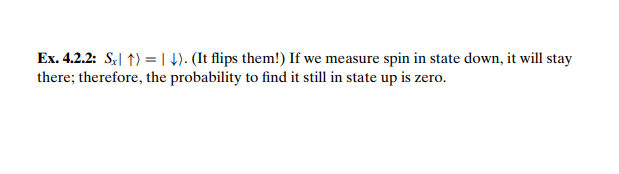
    
### 4.3.2
    Realice los mismos cálculos que en el último ejemplo, utilizando el Ejercicio   4.3.1. Luego dibuje la distribución de probabilidad de los valores propios como en el ejemplo anterior.
### 4.4.1
    Compruebe que:
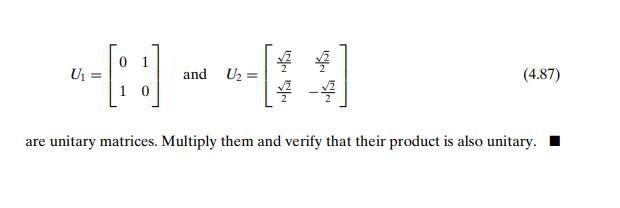



### 4.4.2
    Vuelva al Ejemplo 3.3.2 (bola de billar cuántica), mantenga lo mismo vector de estado inicial [1, 0, 0, 0]T, pero cambie el mapa unitario a:

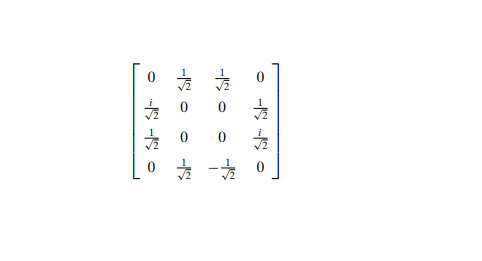

    Determine el estado del sistema después de tres pasos de tiempo. ¿Cuál es la posibilidad de la bola cuántica que se encuentra en el punto 3